# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')


##### 2. Print the first ten rows of each dataframe.

In [2]:
act[:10]

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
sat[:10]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

#### ACT Columns

---

State: string name of the state (also an entry for national)

Participation: integer percent

English: float score

Math: float score

Reading: float score

Science: float score

Composite: float score

#### SAT Columns

---

State: string name for state

Participation: integer percent

Evidence based reading and writing: integer score

Math: integer score

total: integer score

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. There are no null values. The row numbers match in both seperate data sets.

Apparent issues are participation rates being considered objects, they will be converted to a numerical type. The Unnamed column is redundant and will be replaced.

In [4]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [5]:
act.isnull().sum().sum()

0

In [6]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [7]:
sat.isnull().sum().sum()

0

##### 5. Print the types of each column.

In [8]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [9]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Evidence-Based Reading and Writing in the SAT data will be renamed to English. Object type for Participation will be convereted into float type and % symbols will be removed. Unnamed columns, which are redundant with index column will be removed,

In [10]:
# Renaming this column to something nimbler
sat.rename(columns={'Evidence-Based Reading and Writing':'English'}, inplace=True)

In [11]:
# Use a lambda function to replace the % symbol and convert to float
# This is done for both the ACT and SAT data
act.Participation = act.Participation.map(lambda x: float(x.replace('%','')))
sat.Participation = sat.Participation.map(lambda x: float(x.replace('%','')))

In [12]:
# Dropping the redundant index column
act.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# Check data
act[:5]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [14]:
# Dropping the redundant index column
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
# Check data
sat[:5]

,State,Participation,English,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [16]:
def create_dict(df, key_column, val_column):
    zip_dict = dict([(i, a) for i, a in zip(df[key_column], df[val_column])])
    return zip_dict

# Create ACT dictionaries
act_participation_by_state = create_dict(act, 'State', 'Participation')
act_english_by_state = create_dict(act, 'State', 'English')
act_math_by_state = create_dict(act, 'State', 'Math')
act_reading_by_state = create_dict(act, 'State', 'Reading')
act_science_by_state = create_dict(act, 'State', 'Science')
act_composite_by_state = create_dict(act, 'State', 'Composite')

# Create SAT dictionaries
sat_participation_by_state = create_dict(sat, 'State', 'Participation')
sat_english_by_state = create_dict(sat, 'State', 'English')
sat_math_by_state = create_dict(sat, 'State', 'Math')
sat_total_by_state = create_dict(sat, 'State', 'Total')

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [17]:
# Creates a dictionary of the following form,
# {df column name : list[values from df column]}
def dataframe_columns_to_dict(df):
    new_dict = {}
    for column in df:
        new_dict.update(df.set_index(column).to_dict('list'))
    return new_dict

# Call function from above for the ACT and the SAT data sets
new_act_dict = dataframe_columns_to_dict(act)
new_sat_dict = dataframe_columns_to_dict(sat)

##### 9. Merge the dataframes on the state column.

In [18]:
# Merging ACT and SAT dataframes using the state column
test_data = pd.merge(act, sat, how='inner', on='State', suffixes=('_ACT','_SAT'))
display(test_data)

,State,Participation_ACT,English_ACT,Math_ACT,Reading,Science,Composite,Participation_SAT,English_SAT,Math_SAT,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [19]:
# Column renaming using a dictionary
test_data.rename(columns={
    'Reading' : 'Reading_ACT', 
    'Science' : 'Science_ACT',
    'Composite' : 'Composite_ACT',
     'Total' : 'Total_SAT'
    }, inplace=True)

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [20]:
# Calling min function on entire dataframe
test_data.min()

State                Alabama
Participation_ACT          8
English_ACT             16.3
Math_ACT                  18
Reading_ACT             18.1
Science_ACT              2.3
Composite_ACT           17.8
Participation_SAT          2
English_SAT              482
Math_SAT                  52
Total_SAT                950
dtype: object

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [21]:
# Function that takes a dataframe and returns a list where 
# each entry is the stdev for a column in the dataframe
def make_stdev_list(df):
    # Create empty list for stdevs
    sd = []
    
    # use list comprehension to apply the std() method to only numerical
    # columns and append these values to the empty list
    [sd.append(df[column].std()) for column in df \
     if df[column].dtype == float or df[column].dtype == int]
    
    return sd

# Call the function
stdev_list = make_stdev_list(test_data)

# Output the function
stdev_list

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

Passing over 13 per advice because it will just make life harder

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [22]:
# Sorting by increasing SAT participation rate, not using inplace=True because I don't care to modify the df here
test_data.sort_values(by=['Participation_SAT'])

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,English_SAT,Math_SAT,Total_SAT
34,North Dakota,98.0,19.0,20.4,20.5,20.6,20.3,2.0,635,621,1256
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634,607,1242
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641,635,1275
25,Missouri,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640,631,1271
44,Utah,100.0,19.5,19.9,20.8,20.6,20.3,3.0,624,614,1238
41,South Dakota,80.0,20.7,21.5,22.3,22.0,21.8,3.0,612,603,1216
27,Nebraska,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,625,1253
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642,649,1291
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644,651,1295
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626,604,1230


In [142]:
# For presentation: finding the mean composite score for the ACT
ACT_comp_mean = test_data['Composite_ACT'].mean()
ACT_comp_mean

21.477999999999998

In [144]:
# For presentation: finding states with above average ACT scores and low SAT participation
test_data[test_data['Composite_ACT'] > 21.5 ][['State','Participation_SAT','Composite_ACT']].sort_values(by='Participation_SAT')

,State,Participation_SAT,Composite_ACT
15,Iowa,2.0,21.9
41,South Dakota,3.0,21.8
16,Kansas,4.0,21.7
35,Ohio,12.0,22.0
37,Oregon,43.0,21.8
4,California,53.0,22.8
45,Vermont,60.0,23.6
14,Indiana,63.0,22.6
47,Washington,64.0,21.9
46,Virginia,65.0,23.8


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [23]:
# Call with the form: df[column filter][[column]]
test_data[test_data['Participation_SAT'] > 50][['Participation_SAT']]

,Participation_SAT
4,53.0
6,100.0
7,100.0
8,100.0
9,83.0
10,61.0
11,55.0
12,93.0
14,63.0
19,95.0


In [24]:
# Removing Maryland because it is an outlier in several columns and makes
# visually evaluating much of the following charts difficult
# this is a discrecionary choice
test_data.drop(index=20, inplace=True)

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

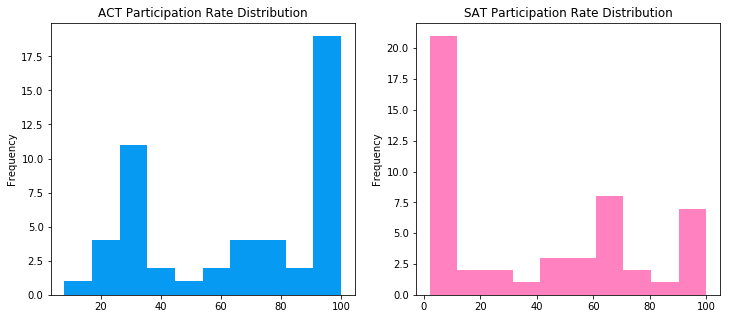

In [46]:
# Import needed library
import matplotlib.pyplot as plt

figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
test_data['Participation_ACT'].plot(kind='hist',
                                    title='ACT Participation Rate Distribution',
                                    color='xkcd:azure', 
                                    ax=ax[0])
test_data['Participation_SAT'].plot(kind='hist', 
                                    title='SAT Participation Rate Distribution',
                                    color='xkcd:pink', 
                                    ax=ax[1]);

##### 17. Plot the Math(s) distributions from both data sets.

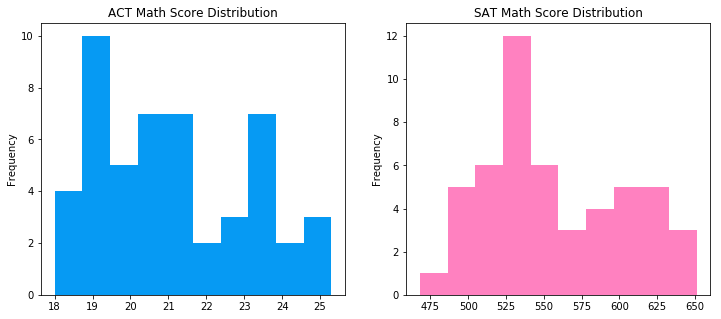

In [44]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
act = test_data['Math_ACT'].plot(kind='hist', 
                                 title='ACT Math Score Distribution', 
                                 color='xkcd:azure', 
                                 ax=ax[0]);
sat = test_data['Math_SAT'].plot(kind='hist',
                                 title='SAT Math Score Distribution',
                                 color='xkcd:pink', 
                                 ax=ax[1]);

##### 18. Plot the Verbal distributions from both data sets.

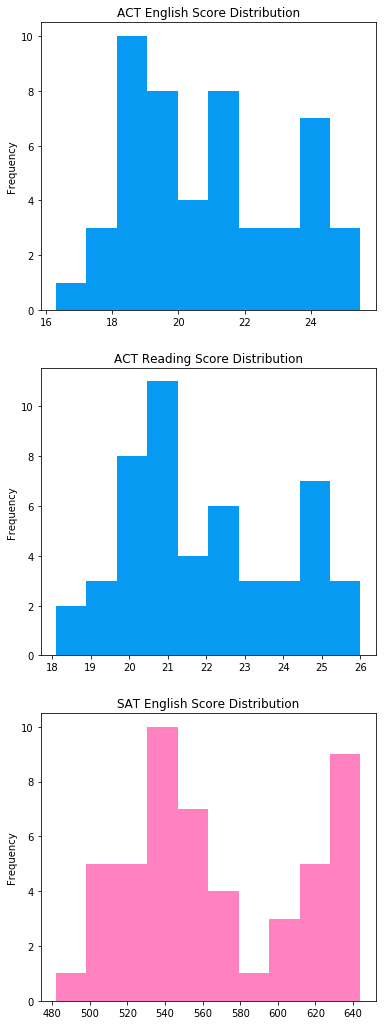

In [48]:
figure, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,18))
test_data['English_ACT'].plot(kind='hist',
                              title='ACT English Score Distribution',
                              color='xkcd:azure', 
                              ax=ax[0])
test_data['Reading_ACT'].plot(kind='hist',
                              title='ACT Reading Score Distribution',
                              color='xkcd:azure', 
                              ax=ax[1])
test_data['English_SAT'].plot(kind='hist',
                              title='SAT English Score Distribution',
                              color='xkcd:pink', 
                              ax=ax[2]);

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Most commonly the data is assumed to be normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

Per the plots below it does not appear that any of the data are normal.

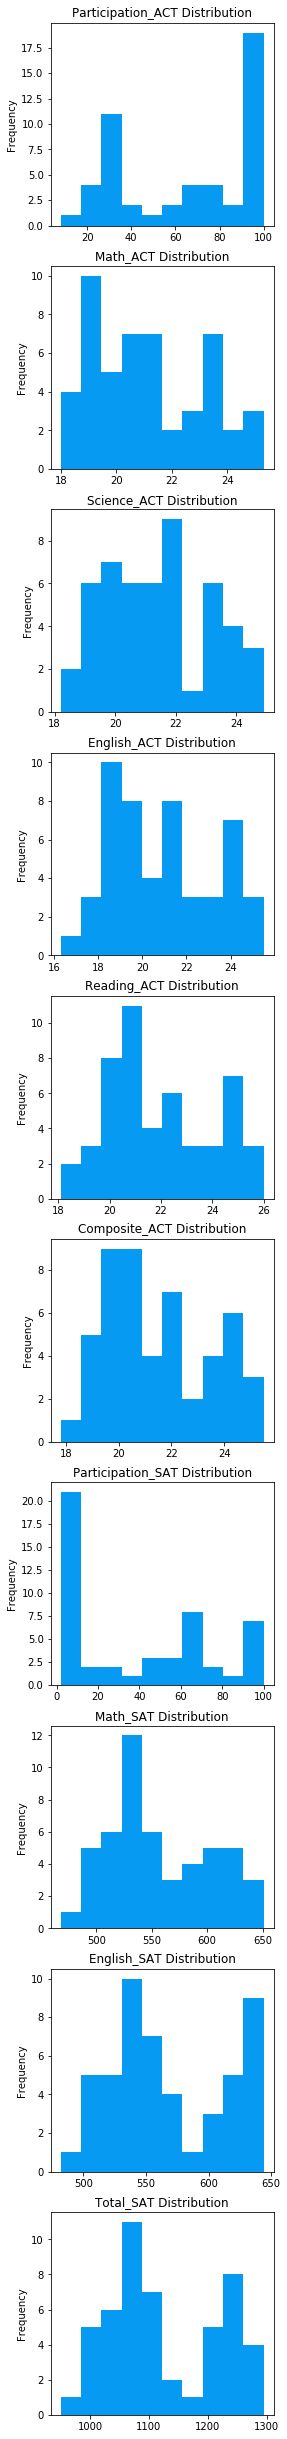

In [50]:
# List of data columns to loop through and plot
plot_list = ['Participation_ACT', 
             'Math_ACT', 
             'Science_ACT', 
             'English_ACT', 
             'Reading_ACT', 
             'Composite_ACT',
             'Participation_SAT',
             'Math_SAT',
             'English_SAT',
             'Total_SAT']

figure_height = 4*(len(plot_list)+1)

figure, ax = plt.subplots(nrows=len(plot_list), ncols=1, figsize=(4,figure_height))

for index, item in enumerate(plot_list):
    test_data[item].plot(kind='hist', 
                         title='{} Distribution'.format(item), 
                         color='xkcd:azure', 
                         ax=ax[index])

##### 21. Plot some scatterplots examining relationships between all variables.

Below I'm utilitizng seaborn's pairplot to quickly see all scatterplots at once. This will make it much easier to quickly evaluate and find interesting trends in the data.

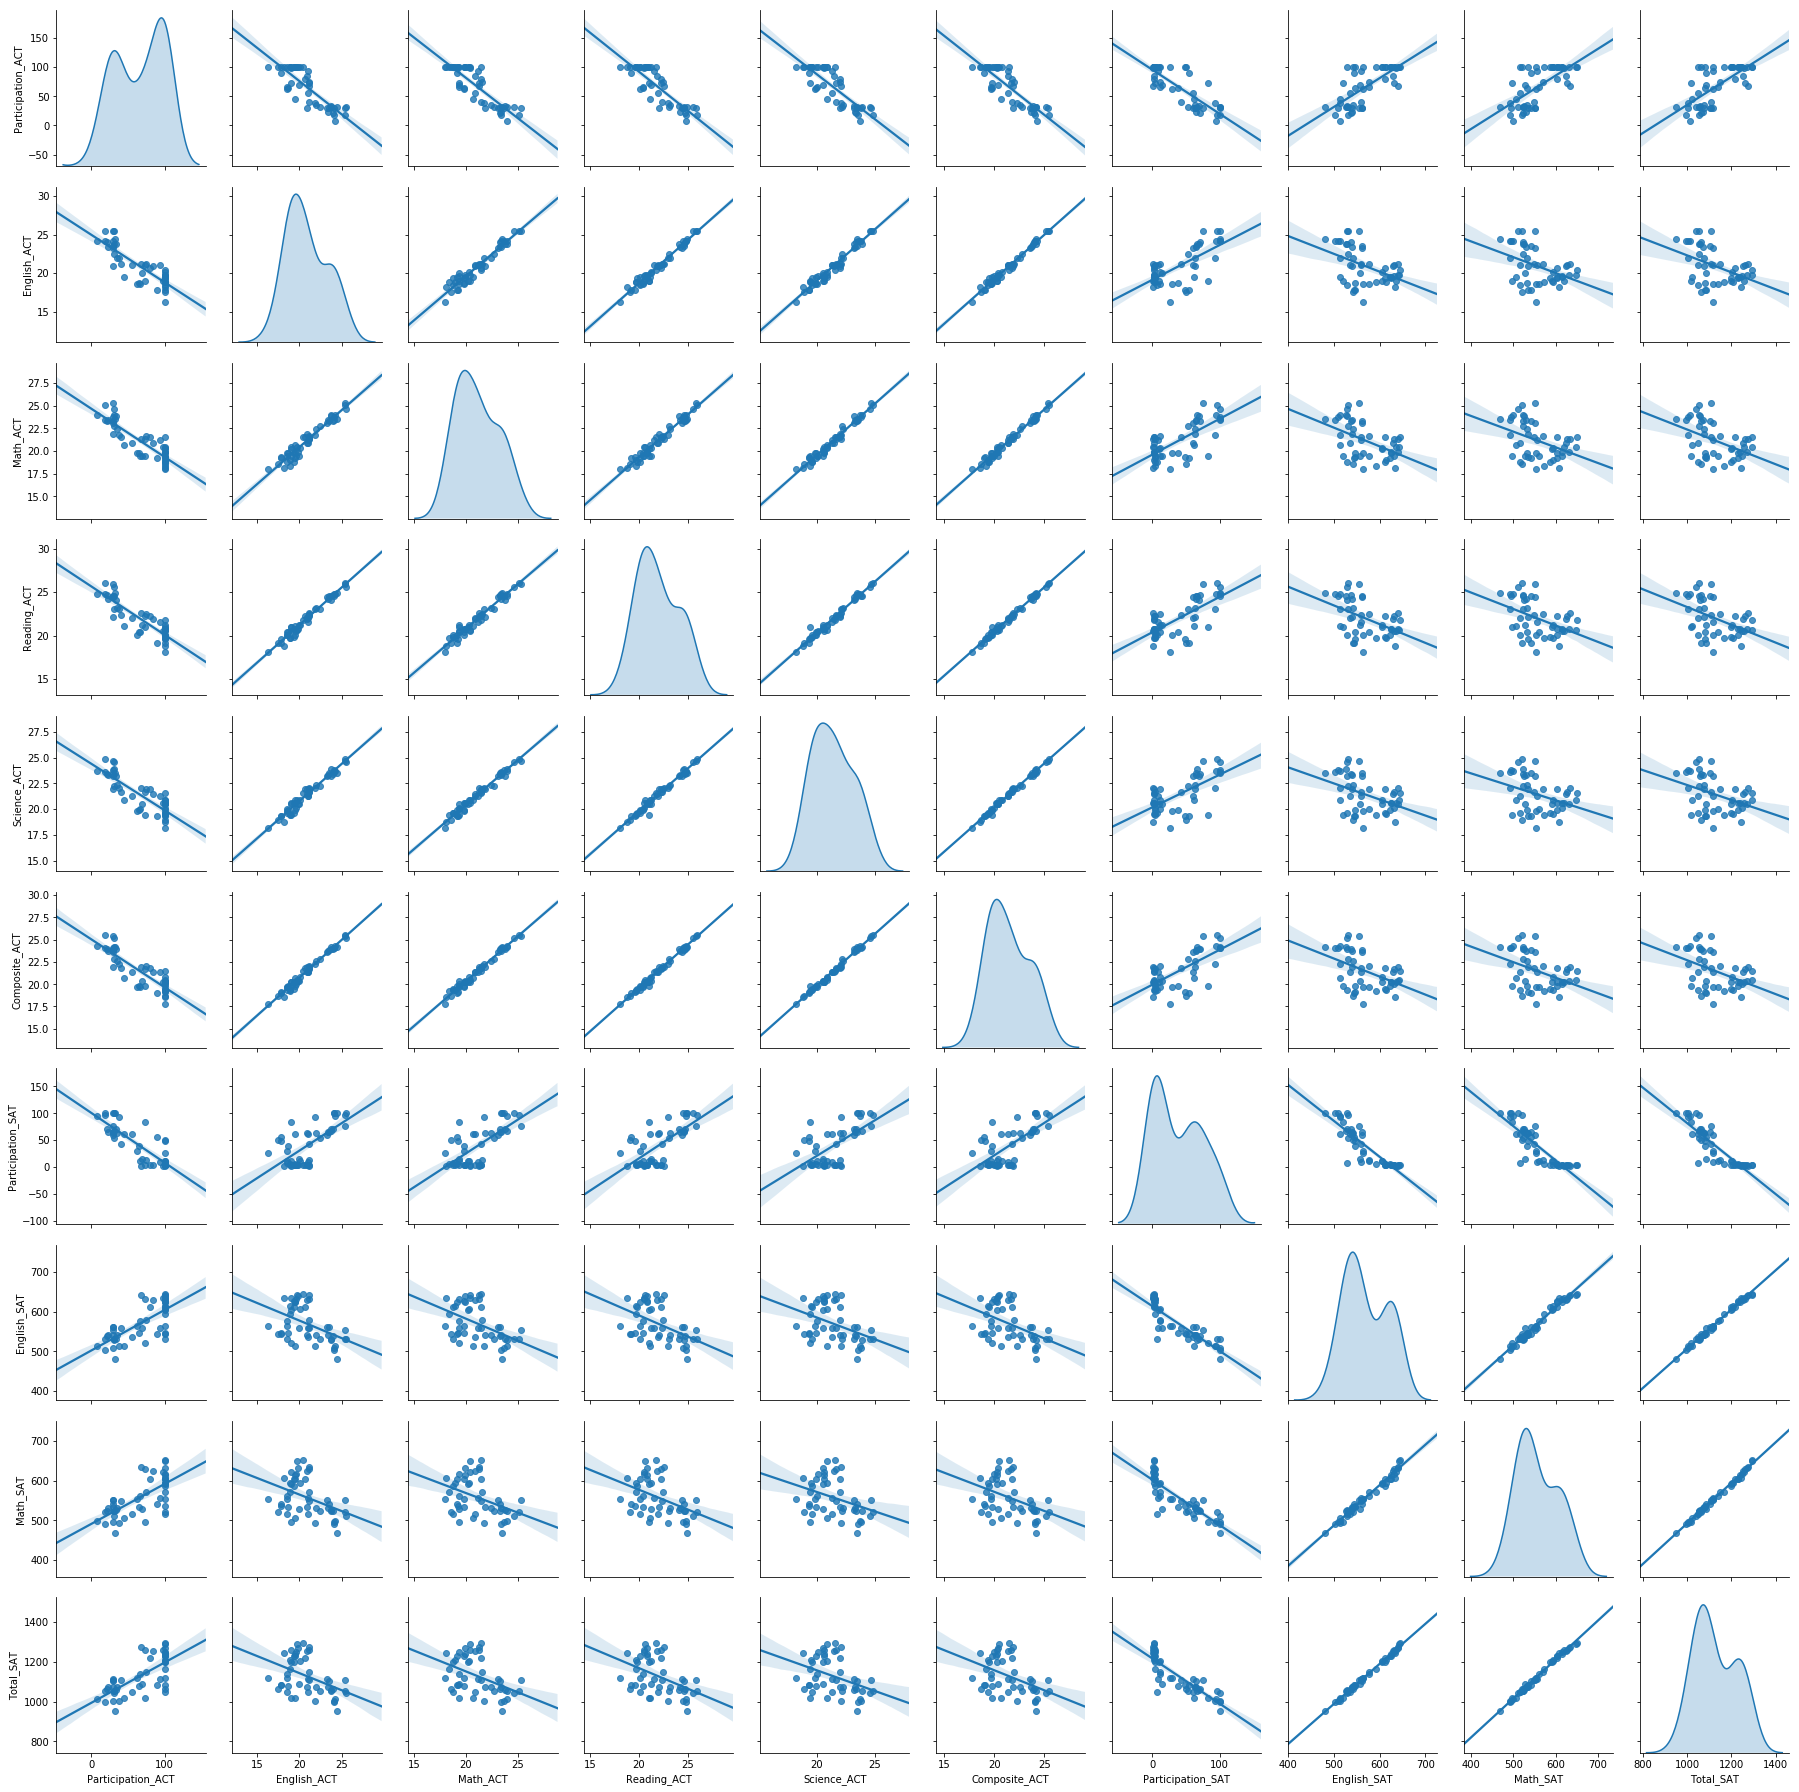

In [29]:
import seaborn as sns
sns.pairplot(test_data, 
             diag_kind='kde', 
             kind='reg', 
             palette='xkcd:azure', 
             diag_kws=dict(shade=True)
            );

In [30]:
# Tabled data for more detailed look
test_data.corr()

,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,English_SAT,Math_SAT,Total_SAT
Participation_ACT,1.000000,-0.839896,-0.858199,-0.863295,-0.832826,-0.854748,-0.839044,0.712619,0.678772,0.697803
English_ACT,-0.839896,1.000000,0.967166,0.985715,0.979621,0.990664,0.681707,-0.453582,-0.412666,-0.434026
Math_ACT,-0.858199,0.967166,1.000000,0.979280,0.986679,0.990294,0.706039,-0.478959,-0.412677,-0.446606
Reading_ACT,-0.863295,0.985715,0.979280,1.000000,0.987797,0.994965,0.700387,-0.480869,-0.434479,-0.458773
Science_ACT,-0.832826,0.979621,0.986679,0.987797,1.000000,0.995030,0.647905,-0.413745,-0.356655,-0.385895
Composite_ACT,-0.854748,0.990664,0.990294,0.994965,0.995030,1.000000,0.689645,-0.462642,-0.409631,-0.437020
Participation_SAT,-0.839044,0.681707,0.706039,0.700387,0.647905,0.689645,1.000000,-0.872864,-0.853513,-0.866038
English_SAT,0.712619,-0.453582,-0.478959,-0.480869,-0.413745,-0.462642,-0.872864,1.000000,0.986929,0.996627
Math_SAT,0.678772,-0.412666,-0.412677,-0.434479,-0.356655,-0.409631,-0.853513,0.986929,1.000000,0.996792
Total_SAT,0.697803,-0.434026,-0.446606,-0.458773,-0.385895,-0.437020,-0.866038,0.996627,0.996792,1.000000


##### 22. Are there any interesting relationships to note?

1. All individual sections are strong, positive predictors of composite score or total score
2. In both tests, participation rates are negatively correlated with score performance
3. The tests are inversely related to one another's participation rate
4. There is a positive correlation between ACT composite and SAT Participation
5. There don't seem to be strong relationships between similar test sections

Observations 2, 3, and 4 are plotted in matplotlib below for greater detail.

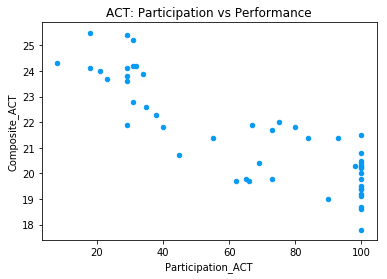

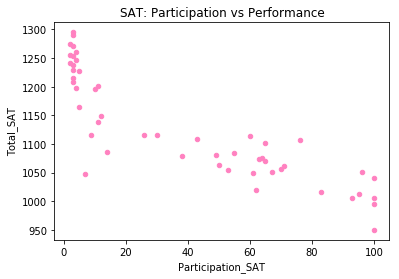

In [70]:
#Observation 2 charts
ob2ACT = test_data.plot(kind='scatter',
                        x='Participation_ACT',
                        y='Composite_ACT',
                        title='ACT: Participation vs Performance',
                        color='xkcd:azure');
ob2SAT = test_data.plot(kind='scatter',
                        x='Participation_SAT',
                        y='Total_SAT',
                        title='SAT: Participation vs Performance',
                        color='xkcd:pink');



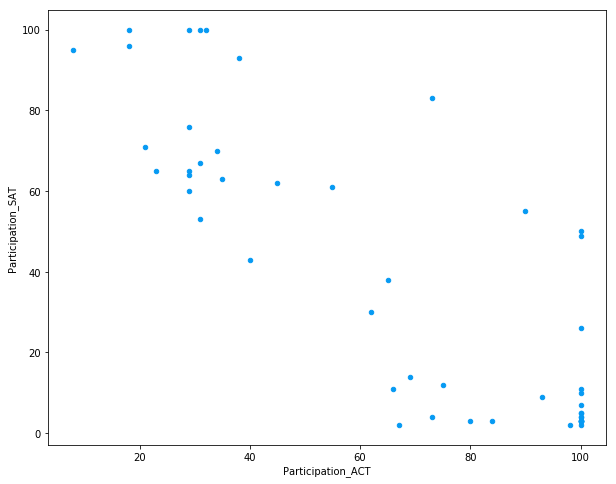

In [151]:
# Observation 3 charts
ob3 = test_data.plot(kind='scatter',
                    x='Participation_ACT',
                    y='Participation_SAT',
                    figsize=(10,8),
                    #title='Participation: ACT vs SAT',
                    color='xkcd:azure')

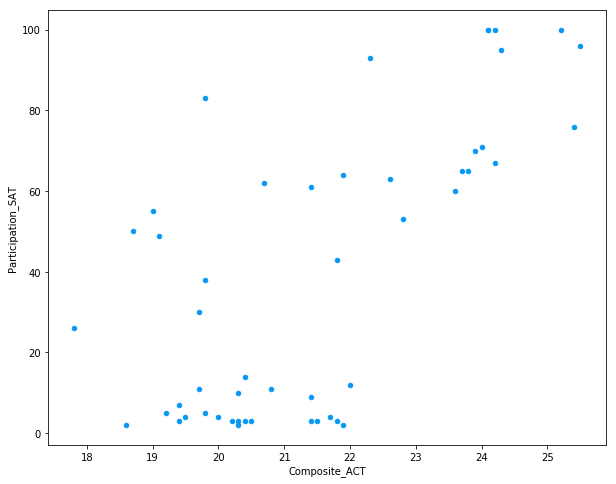

In [150]:
# Observation 4 chart
ob4 = test_data.plot(kind='scatter',
                    x='Composite_ACT',
                    y='Participation_SAT',
                    figsize=(10,8),
                    #title='SAT Participation vs ACT Composite Score',
                    color='xkcd:azure')

##### 23. Create box plots for each variable. 

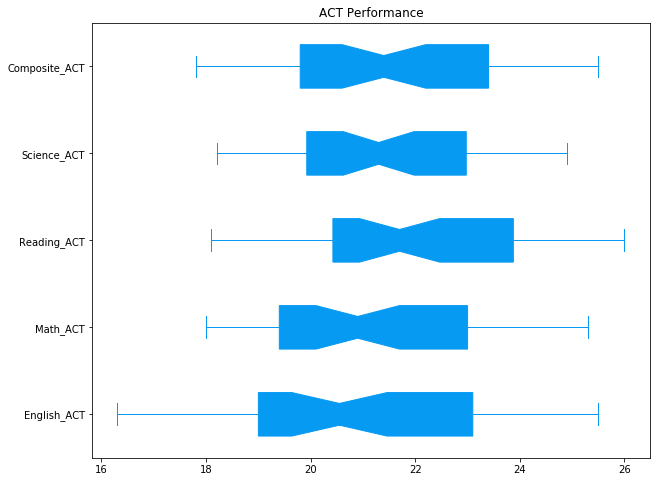

In [119]:
# ACT performance boxplot
test_data.drop(['Participation_SAT',
                'Total_SAT',
                'English_SAT',
                'Math_SAT',
                'Participation_ACT'], axis=1).plot(kind='box',
                                                   figsize=(10,8), 
                                                   color='xkcd:azure',
                                                   vert=False,
                                                   title='ACT Performance',
                                                   notch=True,
                                                   patch_artist=True);

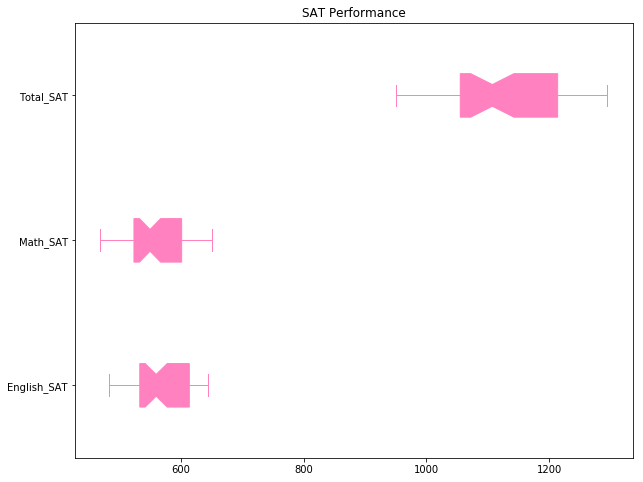

In [120]:
# SAT performance boxplot
test_data.drop(['Participation_ACT',
                'Composite_ACT',
                'English_ACT',
                'Math_ACT',
                'Reading_ACT',
                'Science_ACT',
                'Participation_SAT'], axis=1).plot(kind='box',
                                                   figsize=(10,8), 
                                                   color='xkcd:pink',
                                                   vert=False,
                                                   notch=True,
                                                   title='SAT Performance',
                                                   patch_artist=True);

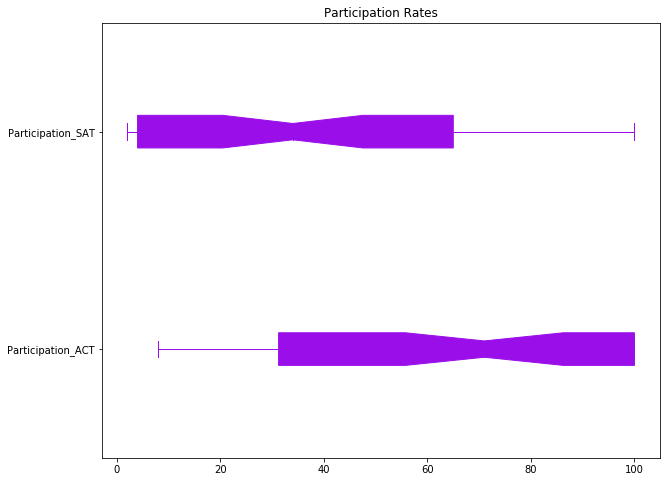

In [121]:
# Test participation rates boxplots
test_data.drop(['Composite_ACT',
                'English_ACT',
                'Math_ACT',
                'Reading_ACT',
                'Science_ACT',
                'Math_SAT',
                'English_SAT',
                'Total_SAT'], axis=1).plot(kind='box', 
                                                   color='xkcd:violet',
                                                   figsize=(10,8),
                                                   vert=False,
                                                   notch=True,
                                                   title='Participation Rates',
                                                   patch_artist=True);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

The three crucial aspects for describing distributions are: center, spread, and shape.

The center is given below by the mean for every distribution, the standard deviation conveys the spread, and the shape for all the distributions was non-normal, as seen in the part 20.

In [34]:
# Describe the basic statistics of every distribution and transpose table for legibility
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation_ACT,50.0,66.000,32.019127,8.0,31.250,71.00,100.000,100.0
English_ACT,50.0,20.884,2.352884,16.3,19.000,20.55,23.100,25.5
Math_ACT,50.0,21.144,1.982902,18.0,19.400,20.90,23.000,25.3
Reading_ACT,50.0,21.970,2.064298,18.1,20.425,21.70,23.875,26.0
Science_ACT,50.0,21.416,1.738796,18.2,19.925,21.30,22.975,24.9
Composite_ACT,50.0,21.478,2.019021,17.8,19.800,21.40,23.400,25.5
Participation_SAT,50.0,39.220,35.384933,2.0,4.000,34.00,65.000,100.0
English_SAT,50.0,569.780,45.882410,482.0,532.750,559.50,613.500,644.0
Math_SAT,50.0,557.540,47.362781,468.0,523.250,549.50,601.000,651.0
Total_SAT,50.0,1127.420,92.945911,950.0,1055.250,1107.50,1214.000,1295.0


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

The relationships are considered to have no significant correlation when under 0.3, weakly correlated from 0.3 to 0.5, moderately correlated from 0.5 to 0.7, strongly correlated when over 0.7, and perfectly correlated when 1.0. This framework can be applied to the correlation summary table below.

A positive value indicates a positive relationship; whereas, a negative value indicates a negative relationship.

Specific observations of interest are noted in part 20.

In [35]:
# Find the correlations of all distibutions
test_data.corr()

,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,English_SAT,Math_SAT,Total_SAT
Participation_ACT,1.000000,-0.839896,-0.858199,-0.863295,-0.832826,-0.854748,-0.839044,0.712619,0.678772,0.697803
English_ACT,-0.839896,1.000000,0.967166,0.985715,0.979621,0.990664,0.681707,-0.453582,-0.412666,-0.434026
Math_ACT,-0.858199,0.967166,1.000000,0.979280,0.986679,0.990294,0.706039,-0.478959,-0.412677,-0.446606
Reading_ACT,-0.863295,0.985715,0.979280,1.000000,0.987797,0.994965,0.700387,-0.480869,-0.434479,-0.458773
Science_ACT,-0.832826,0.979621,0.986679,0.987797,1.000000,0.995030,0.647905,-0.413745,-0.356655,-0.385895
Composite_ACT,-0.854748,0.990664,0.990294,0.994965,0.995030,1.000000,0.689645,-0.462642,-0.409631,-0.437020
Participation_SAT,-0.839044,0.681707,0.706039,0.700387,0.647905,0.689645,1.000000,-0.872864,-0.853513,-0.866038
English_SAT,0.712619,-0.453582,-0.478959,-0.480869,-0.413745,-0.462642,-0.872864,1.000000,0.986929,0.996627
Math_SAT,0.678772,-0.412666,-0.412677,-0.434479,-0.356655,-0.409631,-0.853513,0.986929,1.000000,0.996792
Total_SAT,0.697803,-0.434026,-0.446606,-0.458773,-0.385895,-0.437020,-0.866038,0.996627,0.996792,1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [36]:
# Import stats and perform t test on participation rates for the ACT and SAT
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(test_data['Participation_ACT'], test_data['Participation_SAT'])
t_stat, p_value

(3.9681103343042947, 0.00013804998899950548)

A high t-score, 3.97, results in a very small p-value, 0.00014, far smaller than our alpha criteria of 0.05. In this case we will reject the null hypothesis and conclude that there is a significant difference in the SAT and ACT participation rates.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [37]:
# Reusing code from the other days lab :)
def get_conf_interval(df, column, significance):
    """
    Takes a DataFrame, the name of a data column and one of three signifance levels: 
    90%, 95%, and 99% these significance levels should be input as integers
    """
    
    # Logic to navigate the various significance intervals
    if significance == 90:
        z_star = 1.645
    elif significance == 95:
        z_star = 1.96
    elif significance == 99:
        z_star = 2.576
    # If none of the three specified significance intervals are specified
    # Return none and give an appropriate message
    else:
        print('Significance level must be 90, 95, or 99!')
        return None
    
    # Assign variables for calculating confidence interval
    sample_mean = df[column].mean()
    sigma = df[column].std()
    n = df[column].count()
    
    # Calculate low and high end of confidence interval
    low_end = sample_mean - z_star * sigma / n ** 0.5
    high_end = sample_mean + z_star * sigma / n ** 0.5
    
    print('The confidence interval for {} at significance level of {}%, is: {} to {}'.format(column, significance, low_end,high_end))
    
    return

In [38]:
# Get confidence interval for the ACT participation
get_conf_interval(test_data, 'Participation_ACT', 95)

The confidence interval for Participation_ACT at significance level of 95%, is: 57.12475082039946 to 74.87524917960053


In [39]:
# Get confidence interval for the SAT participation
get_conf_interval(test_data, 'Participation_SAT', 95)

The confidence interval for Participation_SAT at significance level of 95%, is: 29.411797033095205 to 49.02820296690479


The meaning of these confidence intervals, given the significance level, is that there is a 95% chance that the sample mean falls within the stated range. 

For the ACT, there is a 95% chance that the sample mean falls between 57.1 and 74.9

For the SAT, there is a 95% chance that the sample mean falls between 29.4 and 49.0

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

This is not surprising. Part 26 indicated that there was a significant difference between the sample means of participation for the ACT and the SAT. Congruously, part 27 indicated that the confidence intervals of these two tests are very different.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [40]:
# Call correlation method on only the math sections from the ACT and SAT
test_data[['Math_ACT', 'Math_SAT']].corr()

,Math_ACT,Math_SAT
Math_ACT,1.000000,-0.412677
Math_SAT,-0.412677,1.000000


Yes, it makes sense to generate a correlation between basically any measures; whether or not that correlation is significant is a different question.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Yes, it makes sense to conduct statistical inference between these two.

We can properly execute the statistical inference, having enough data, the right methods, and reasonable assurance of significance. Additionally, there are many tests that contrast the ACT and SAT data that are strategically justifiable, such as using a t-test to compare the participation rates.